In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
df=pd.read_csv('matches.csv')
pd.set_option('display.max_columns', None)

In [269]:
df.shape

(32, 18)

In [270]:
df.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


In [271]:
df.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           32 non-null     object 
 1   team1            32 non-null     object 
 2   team2            32 non-null     object 
 3   date             32 non-null     object 
 4   match_number     32 non-null     int64  
 5   venue            32 non-null     object 
 6   city             32 non-null     object 
 7   toss_winner      32 non-null     object 
 8   toss_decision    32 non-null     object 
 9   player_of_match  32 non-null     object 
 10  umpire1          32 non-null     object 
 11  umpire2          32 non-null     object 
 12  reserve_umpire   31 non-null     object 
 13  match_referee    32 non-null     object 
 14  winner           32 non-null     object 
 15  winner_runs      16 non-null     float64
 16  winner_wickets   16 non-null     float64
 17  match_type       3

In [273]:
df.drop(['season','date', 'match_number','player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type','city'],axis='columns',inplace=True)

df.shape

(32, 5)

In [274]:
df.head()

,team1,team2,venue,toss_winner,toss_decision
0,England,New Zealand,Narendra Modi Stadium,New Zealand,field
1,Pakistan,Netherlands,Rajiv Gandhi International Stadium,Netherlands,field
2,Afghanistan,Bangladesh,Himachal Pradesh Cricket Association Stadium,Bangladesh,field
3,South Africa,Sri Lanka,Arun Jaitley Stadium,Sri Lanka,field
4,Australia,India,MA Chidambaram Stadium,Australia,bat


In [275]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

team1: ['England' 'Pakistan' 'Afghanistan' 'South Africa' 'Australia'
 'New Zealand' 'Sri Lanka' 'Bangladesh' 'Netherlands' 'India']
team2: ['New Zealand' 'Netherlands' 'Bangladesh' 'Sri Lanka' 'India' 'Pakistan'
 'Australia' 'England' 'South Africa' 'Afghanistan']
venue: ['Narendra Modi Stadium' 'Rajiv Gandhi International Stadium'
 'Himachal Pradesh Cricket Association Stadium' 'Arun Jaitley Stadium'
 'MA Chidambaram Stadium'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium'
 'Maharashtra Cricket Association Stadium' 'M Chinnaswamy Stadium'
 'Wankhede Stadium' 'Eden Gardens']
toss_winner: ['New Zealand' 'Netherlands' 'Bangladesh' 'Sri Lanka' 'Australia'
 'Afghanistan' 'India' 'England' 'South Africa' 'Pakistan']
toss_decision: ['field' 'bat']


<Axes: xlabel='toss_winner', ylabel='count'>

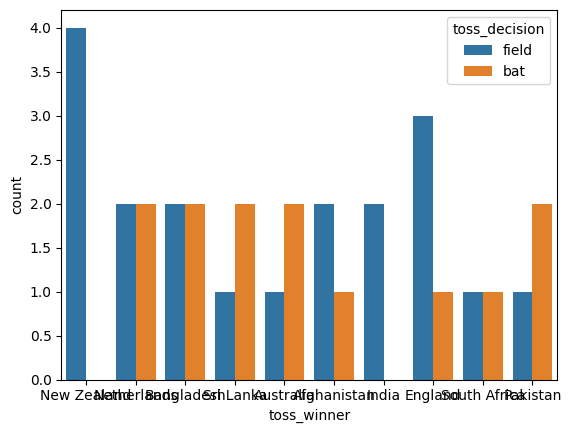

In [276]:
sns.countplot(data=df, x="toss_winner", hue="toss_decision")

In [277]:
X=df.drop('toss_decision',axis='columns')
y=df['toss_decision']

In [278]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [279]:
# enc = OneHotEncoder()
# arr = enc.fit_transform(X).toarray()
# labels = np.array(enc.categories_).ravel()
# features = pd.DataFrame(arr,columns = labels)
# df = df.join(features)

# df.drop(X.columns,axis='columns',inplace=True)
# df.drop('toss_decision',axis='columns',inplace=True)
# df.head()
le=LabelEncoder()
for col in X.columns:
    X[col]=le.fit_transform(X[col])
X

,team1,team2,venue,toss_winner
0,3,6,7,6
1,7,5,8,5
2,0,2,3,2
3,8,9,0,9
4,1,4,5,1
5,6,5,8,5
6,3,2,3,2
7,9,7,8,9
8,0,4,0,0
9,8,1,1,1


In [280]:
# X=df.drop(['Afghanistan','Arun Jaitley Stadium'],axis='columns')

In [281]:
le=LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [282]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,shuffle=True)

In [283]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [284]:
ensembled_classifier=RandomForestClassifier(random_state=42)

In [285]:
ensembled_classifier.fit(X_train,y_train)
y_pred=ensembled_classifier.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.5

In [286]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.8

In [287]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.4

In [288]:
svc=SVC()
svc.fit(X,y)
y_pred=svc.predict(X)
acc=accuracy_score(y_pred,y)
acc

0.90625

In [289]:
import pickle
pickle_out = open("toss_decision.pkl","wb")
pickle.dump(svc, pickle_out)
pickle_out.close()